In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [234]:
files = ['AIRPORTS',
'AREA',
'BUDGET',
'continent',
'CURACCT',
'DEBTFOREIGNERS',
'EDUCATIONSPEND',
'electricconsupmtion',
'emissions',
'EXPORTS',
'fossilelectricity',
'GDP',
'GDPGROWTH',
'GDPPERCAP',
'hydroelectricity',
'IMPORTS',
'INDUSTPRODGR',
'internetusers',
'LIFEXP',
'MARMERCHANT',
'MIGRATION',
'MILIEXPENDITURE',
'naturalgasconsumption',
'nuclearelectricity',
'otherrenewableelectricity',
'petroleumconsumption',
'POPGROWTH',
'POPULATION',
'PUBLICDEBT',
'RAILWAYS',
'ROADWAYS',
'UNEMPLOYMENT',
'WATERWAYS',
'WORKFORCE']

In [235]:
pd_dict = {}
for file in files:
    pd_dict[file] = pd.read_csv('{}.csv'.format(file))

In [236]:
# file.head()
pd_dict['AIRPORTS'].head()

,Unnamed: 0,COUNTRY,AIRPORTS,YEAR
0,1,United States,"13,513",2013
1,2,Brazil,"4,093",2013
2,3,Mexico,"1,714",2013
3,4,Canada,"1,467",2013
4,5,Russia,"1,218",2013


In [237]:
base_df = pd_dict['continent']
area_df = pd_dict['AREA']

In [238]:
base_df = pd_dict['continent']
area_df = pd_dict['AREA']
petrol_df = pd_dict['petroleumconsumption']
users_df = pd_dict['internetusers']
hydro_df = pd_dict['hydroelectricity']
nuclear_df = pd_dict['nuclearelectricity']
otherrenew_df = pd_dict['otherrenewableelectricity']
mili_df = pd_dict['MILIEXPENDITURE']
co2_df = pd_dict['emissions']
mili_df.rename(columns = {'% OF GDP':'mili_exp_%_gdp'}, inplace = True)
population_df = pd_dict['POPULATION']

In [239]:
for i, row in base_df.iterrows():
    row['country_name'] = row['country_name'].split(",")
    row ['country_name'] = row['country_name'][0]

In [240]:
base_df.rename(columns = {'country_name':'Country'}, inplace = True)
base_df.merge(area_df, on = 'Country', how = 'left')

,continent_name,Country,Index,Area_sqKm
0,Asia,Afghanistan,42.00,"652,230.00"
1,Europe,Albania,145.00,"28,748.00"
2,Antarctica,Antarctica (the territory South of 60 deg S),nan,NaN
3,Africa,Algeria,11.00,"2,381,740.00"
4,Oceania,American Samoa,216.00,224
...,...,...,...,...
252,Africa,Zambia,40.00,"752,618.00"
253,Oceania,Disputed Territory,nan,NaN
254,Asia,Iraq-Saudi Arabia Neutral Zone,nan,NaN
255,Asia,United Nations Neutral Zone,nan,NaN


In [241]:
mili_df.head()

,Unnamed: 0,COUNTRY,mili_exp_%_gdp,YEAR,Unnamed: 4
0,1,Saudi Arabia,8.78,2018,NaN
1,2,Oman,8.17,2018,NaN
2,3,United Arab Emirates,5.70,2016,NaN
3,4,Algeria,5.27,2018,NaN
4,5,Kuwait,5.06,2018,NaN


In [242]:
population_df.head()

,Index,Country,Population,Month,Year,Unnamed: 5
0,1,China,"1,394,015,977",July,2020,est.
1,2,India,"1,326,093,247",July,2020,est.
2,3,United States,"332,639,102",July,2020,est.
3,4,Indonesia,"267,026,366",July,2020,est.
4,5,Pakistan,"233,500,636",July,2020,est.


In [243]:
base_df.rename(columns = {'country_name':'Country'}, inplace = True)
df1 = base_df.merge(area_df, on = 'Country', how = 'left')

df1.rename(columns = {'Country':'country'}, inplace = True)
df2 = df1.merge(petrol_df, on = 'country', how = 'outer')
df3 = df2.merge(users_df, on = 'country', how = 'outer')
df4 = df3.merge(hydro_df, on = 'country', how = 'outer')
df5 = df4.merge(nuclear_df, on = 'country', how = 'outer')
df6 = df5.merge(otherrenew_df, on = 'country', how = 'outer')
mili_df.rename(columns = {'COUNTRY':'country'}, inplace = True)
df7 = df6.merge(mili_df, on = 'country', how = 'outer')
df8 = df7.merge(co2_df, on = 'country', how = 'outer')
population_df.rename(columns = {'Country':'country'}, inplace = True)
df9 = df8.merge(population_df, on = 'country', how = 'outer')

In [244]:
df9.head()

,continent_name,country,Index_x,Area_sqKm,Unnamed: 0_x,refined_petroleum_consumption_barrels_per_day,year_x,Unnamed: 4_x,Unnamed: 0_y,number_of_internet_users,...,Unnamed: 4_x,Unnamed: 0,year,carbon_emissions_from_energy_consumption_MT,Unnamed: 4_y,Index_y,Population,Month,Year,Unnamed: 5
0,Asia,Afghanistan,42.00,"652,230.00",117.00,"35,000","2,016.00",est.,nan,NaN,...,NaN,111.00,"2,017.00","9,067,000.00",est.,39.00,"36,643,815",July,2020,est.
1,Europe,Albania,145.00,"28,748.00",120.00,"29,000","2,016.00",est.,111.00,"2,016,516",...,est.,136.00,"2,017.00","4,500,000.00",est.,136.00,"3,074,579",July,2020,est.
2,Antarctica,Antarctica (the territory South of 60 deg S),nan,NaN,nan,NaN,nan,NaN,nan,NaN,...,NaN,nan,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN
3,Africa,Algeria,11.00,"2,381,740.00",37.00,"405,000","2,016.00",est.,37.00,"17,291,463",...,NaN,34.00,"2,017.00","135,900,000.00",est.,35.00,"42,972,878",July,2020,est.
4,Oceania,American Samoa,216.00,224,192.00,"2,375","2,016.00",est.,206.00,"17,000",...,NaN,189.00,"2,017.00","361,100.00",est.,211.00,"49,437",July,2020,est.


In [245]:
final_df = df9[['continent_name','country','Area_sqKm','refined_petroleum_consumption_barrels_per_day','number_of_internet_users', 'hydro_percentage_of_electricity_production','nuclear_percentage_of_electricity_production', 'other_renewable_percentage_of_electricity_production','mili_exp_%_gdp',"carbon_emissions_from_energy_consumption_MT","Population"]].copy(deep=False)
final_df

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population
0,Asia,Afghanistan,"652,230.00","35,000",NaN,52.00,0.00,4.00,0.99,"9,067,000.00","36,643,815"
1,Europe,Albania,"28,748.00","29,000","2,016,516",95.00,0.00,0.00,1.26,"4,500,000.00","3,074,579"
2,Antarctica,Antarctica (the territory South of 60 deg S),NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN
3,Africa,Algeria,"2,381,740.00","405,000","17,291,463",1.00,0.00,2.00,5.27,"135,900,000.00","42,972,878"
4,Oceania,American Samoa,224,"2,375","17,000",0.00,0.00,2.00,nan,"361,100.00","49,437"
...,...,...,...,...,...,...,...,...,...,...,...
278,NaN,"Micronesia, Federated States of",NaN,NaN,"33,000",1.00,0.00,3.00,nan,105,"102,436"
279,NaN,Antarctica,NaN,NaN,"4,400",nan,nan,nan,nan,NaN,NaN
280,NaN,North Macedonia,NaN,NaN,NaN,nan,nan,nan,1.19,NaN,NaN
281,NaN,Paracel Islands,NaN,NaN,NaN,nan,nan,nan,nan,NaN,"1,440"


In [246]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 282
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   continent_name                                        257 non-null    object 
 1   country                                               283 non-null    object 
 2   Area_sqKm                                             222 non-null    object 
 3   refined_petroleum_consumption_barrels_per_day         221 non-null    object 
 4   number_of_internet_users                              232 non-null    object 
 5   hydro_percentage_of_electricity_production            221 non-null    float64
 6   nuclear_percentage_of_electricity_production          221 non-null    float64
 7   other_renewable_percentage_of_electricity_production  220 non-null    float64
 8   mili_exp_%_gdp                                        164 no

In [247]:
final_df['Area_sqKm'] = final_df['Area_sqKm'].str.replace(',', '')
final_df['refined_petroleum_consumption_barrels_per_day'] = final_df['refined_petroleum_consumption_barrels_per_day'].str.replace(',', '')
final_df['number_of_internet_users'] = final_df['number_of_internet_users'].str.replace(',', '')
final_df['carbon_emissions_from_energy_consumption_MT'] = final_df['carbon_emissions_from_energy_consumption_MT'].str.replace(',', '')
final_df["Population"] = final_df['Population'].str.replace(',', '')

In [248]:
final_df['Area_sqKm'] = final_df['Area_sqKm'].astype(float)
final_df['refined_petroleum_consumption_barrels_per_day'] = final_df['refined_petroleum_consumption_barrels_per_day'].astype(float)
final_df['number_of_internet_users'] = final_df['number_of_internet_users'].astype(float)
final_df['carbon_emissions_from_energy_consumption_MT'] = final_df['carbon_emissions_from_energy_consumption_MT'].astype(float)
final_df['Population'] = final_df['Population'].astype(float)



In [249]:
final_df = final_df.sort_values(by = ['Area_sqKm'], ascending = False)
final_df.dropna(subset=['continent_name', "Area_sqKm"], inplace = True)
final_df.head(n=50)

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,3.93,"1,847,000,000.00","141,722,205.00"
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,1.31,"640,600,000.00","37,694,085.00"
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,3.42,"5,242,000,000.00","332,639,102.00"
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,1.87,"11,670,000,000.00","1,394,015,977.00"
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,1.48,"513,800,000.00","211,715,973.00"
11,Oceania,Australia,"7,741,220.00","1,175,000.00","20,288,409.00",11.00,0.00,17.00,1.89,"439,100,000.00","25,466,459.00"
103,Asia,India,"3,287,263.00","4,521,000.00","374,328,160.00",12.00,2.00,16.00,2.04,"2,383,000,000.00","1,326,093,247.00"
10,South America,Argentina,"2,780,400.00","806,000.00","30,786,889.00",24.00,4.00,3.00,0.86,"203,700,000.00","45,479,118.00"
114,Asia,Kazakhstan,"2,724,900.00","274,000.00","14,100,751.00",14.00,0.00,1.00,0.95,"304,600,000.00","19,091,949.00"
113,Europe,Kazakhstan,"2,724,900.00","274,000.00","14,100,751.00",14.00,0.00,1.00,0.95,"304,600,000.00","19,091,949.00"


In [250]:
final_df.sort_values(by=['Area_sqKm'], ascending = False)

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,3.93,"1,847,000,000.00","141,722,205.00"
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,1.31,"640,600,000.00","37,694,085.00"
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,3.42,"5,242,000,000.00","332,639,102.00"
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,1.87,"11,670,000,000.00","1,394,015,977.00"
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,1.48,"513,800,000.00","211,715,973.00"
...,...,...,...,...,...,...,...,...,...,...,...
47,Asia,Cocos (Keeling) Islands,14.00,nan,nan,nan,nan,nan,nan,nan,596.00
224,Oceania,Tokelau,12.00,nan,805.00,nan,nan,nan,nan,nan,"1,647.00"
86,Europe,Gibraltar,6.50,"78,000.00","27,699.00",0.00,0.00,0.00,nan,"13,340,000.00","29,581.00"
256,Asia,Spratly Islands,5.00,nan,nan,nan,nan,nan,nan,nan,nan


In [251]:
final_df.dropna(subset = ['refined_petroleum_consumption_barrels_per_day'], inplace = True)

In [252]:
final_df.isnull().sum()

continent_name                                           0
country                                                  0
Area_sqKm                                                0
refined_petroleum_consumption_barrels_per_day            0
number_of_internet_users                                 4
hydro_percentage_of_electricity_production               0
nuclear_percentage_of_electricity_production             0
other_renewable_percentage_of_electricity_production     0
mili_exp_%_gdp                                          47
carbon_emissions_from_energy_consumption_MT              0
Population                                               0
dtype: int64

In [253]:
median_exp = final_df['mili_exp_%_gdp'].median()
armed_countries = ['Syria','Qatar']

In [254]:
rows_to_change = list(final_df[(final_df['mili_exp_%_gdp'].isnull()) &
         (final_df.country.isin(armed_countries))].index)

In [255]:
final_df.loc[rows_to_change,'mili_exp_%_gdp'] = median_exp
final_df[final_df.country.isin(armed_countries)]

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population
220,Asia,Syria,"187,437.00","134,000.00","5,476,850.00",17.00,0.00,0.00,1.49,"27,510,000.00","19,398,448.00"
184,Asia,Qatar,"11,586.00","277,000.00","2,129,360.00",0.00,0.00,1.00,1.49,"114,200,000.00","2,444,174.00"


In [256]:
final_df['mili_exp_%_gdp'].fillna(0,inplace = True )

In [257]:
nan = final_df[final_df.isna().any(axis=1)]
nan

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population
0,Asia,Afghanistan,"652,230.00","35,000.00",nan,52.00,0.00,4.00,0.99,"9,067,000.00","36,643,815.00"
212,Africa,South Sudan,"644,329.00","8,000.00",nan,0.00,0.00,1.00,1.33,"1,224,000.00","10,561,244.00"
213,Africa,Western Sahara,"266,000.00","1,700.00",nan,0.00,0.00,0.00,0.00,"268,400.00","652,271.00"
232,North America,Turks and Caicos Islands,948.00,"1,420.00",nan,0.00,0.00,0.00,0.00,"221,800.00","55,926.00"


In [258]:
final_df['number_of_internet_users'].median()

2677502.0

In [259]:
median_int = final_df['number_of_internet_users'].median()
internet_users = ['Afghanistan','South Sudan']

In [260]:
int_rows_to_change = list(final_df[(final_df['number_of_internet_users'].isnull()) &
         (final_df.country.isin(internet_users))].index)

In [261]:
final_df.loc[int_rows_to_change,'number_of_internet_users'] = median_int
final_df[final_df.country.isin(internet_users)]

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population
0,Asia,Afghanistan,"652,230.00","35,000.00","2,677,502.00",52.00,0.00,4.00,0.99,"9,067,000.00","36,643,815.00"
212,Africa,South Sudan,"644,329.00","8,000.00","2,677,502.00",0.00,0.00,1.00,1.33,"1,224,000.00","10,561,244.00"


In [262]:
final_df['number_of_internet_users'].fillna(0,inplace = True )

In [263]:
final_df.isnull().sum()

continent_name                                          0
country                                                 0
Area_sqKm                                               0
refined_petroleum_consumption_barrels_per_day           0
number_of_internet_users                                0
hydro_percentage_of_electricity_production              0
nuclear_percentage_of_electricity_production            0
other_renewable_percentage_of_electricity_production    0
mili_exp_%_gdp                                          0
carbon_emissions_from_energy_consumption_MT             0
Population                                              0
dtype: int64

In [264]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,3.93,"1,847,000,000.00","141,722,205.00"
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,1.31,"640,600,000.00","37,694,085.00"
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,3.42,"5,242,000,000.00","332,639,102.00"
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,1.87,"11,670,000,000.00","1,394,015,977.00"
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,1.48,"513,800,000.00","211,715,973.00"


In [265]:
final_df['renewable_electricity'] = final_df['hydro_percentage_of_electricity_production'] + final_df['nuclear_percentage_of_electricity_production'] + final_df['other_renewable_percentage_of_electricity_production']


In [266]:
continent_df = final_df.pivot_table(index = 'continent_name', values = ['refined_petroleum_consumption_barrels_per_day', 
                                                         'number_of_internet_users','renewable_electricity' 
                                                         ,'carbon_emissions_from_energy_consumption_MT',"mili_exp_%_gdp"], aggfunc = np.mean)



continent_df.reset_index(inplace = True)
continent_df

,continent_name,carbon_emissions_from_energy_consumption_MT,mili_exp_%_gdp,number_of_internet_users,refined_petroleum_consumption_barrels_per_day,renewable_electricity
0,Africa,"27,374,740.82",1.43,"5,868,277.86","77,448.16",37.33
1,Asia,"466,522,251.11",2.50,"39,905,819.38","873,357.78",27.96
2,Europe,"145,304,857.45",1.55,"13,921,629.04","415,172.77",49.60
3,North America,"211,292,992.90",0.52,"12,467,495.10","820,406.45",24.23
4,Oceania,"29,204,432.47",0.25,"1,538,164.29","85,270.29",27.59
5,South America,"96,821,666.67",1.49,"20,381,685.50","485,791.67",51.42


In [267]:
continent_df.columns

Index(['continent_name', 'carbon_emissions_from_energy_consumption_MT',
       'mili_exp_%_gdp', 'number_of_internet_users',
       'refined_petroleum_consumption_barrels_per_day',
       'renewable_electricity'],
      dtype='object')

In [268]:
continent_df
pd.options.display.float_format = '{:,.2f}'.format

print(continent_df)

  continent_name  carbon_emissions_from_energy_consumption_MT  mili_exp_%_gdp  \
0         Africa                                27,374,740.82            1.43   
1           Asia                               466,522,251.11            2.50   
2         Europe                               145,304,857.45            1.55   
3  North America                               211,292,992.90            0.52   
4        Oceania                                29,204,432.47            0.25   
5  South America                                96,821,666.67            1.49   

   number_of_internet_users  refined_petroleum_consumption_barrels_per_day  \
0              5,868,277.86                                      77,448.16   
1             39,905,819.38                                     873,357.78   
2             13,921,629.04                                     415,172.77   
3             12,467,495.10                                     820,406.45   
4              1,538,164.29               

In [269]:
def color_red(value):

    if value >= 100000000 :
        color = 'red'
    elif value < 100000000:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s'% color

In [270]:
continent_df['mili_exp_%_gdp'] = continent_df['mili_exp_%_gdp'].div(100).round(4)
continent_df['renewable_electricity'] = continent_df['renewable_electricity'].div(100).round(4)

cm = sns.light_palette('grey', as_cmap=True)


In [271]:
cdf = continent_df.style.applymap(color_red, subset=['carbon_emissions_from_energy_consumption_MT'])

cdf = continent_df.style.format({'continent_name': str.upper,
                           'carbon_emissions_from_energy_consumption_MT': '{:20,.0f}',"mili_exp_%_gdp":'{:.2%}',
                          "number_of_internet_users":'{:20,.0f}', "refined_petroleum_consumption_barrels_per_day":'{:20,.0f}',"renewable_electricity":'{:.2%}'})

cdf

,continent_name,carbon_emissions_from_energy_consumption_MT,mili_exp_%_gdp,number_of_internet_users,refined_petroleum_consumption_barrels_per_day,renewable_electricity
0,AFRICA,"27,374,741",1.43%,"5,868,278","77,448",37.33%
1,ASIA,"466,522,251",2.50%,"39,905,819","873,358",27.96%
2,EUROPE,"145,304,857",1.55%,"13,921,629","415,173",49.60%
3,NORTH AMERICA,"211,292,993",0.52%,"12,467,495","820,406",24.23%
4,OCEANIA,"29,204,432",0.25%,"1,538,164","85,270",27.59%
5,SOUTH AMERICA,"96,821,667",1.49%,"20,381,686","485,792",51.42%


In [272]:
continent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   continent_name                                 6 non-null      object 
 1   carbon_emissions_from_energy_consumption_MT    6 non-null      float64
 2   mili_exp_%_gdp                                 6 non-null      float64
 3   number_of_internet_users                       6 non-null      float64
 4   refined_petroleum_consumption_barrels_per_day  6 non-null      float64
 5   renewable_electricity                          6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


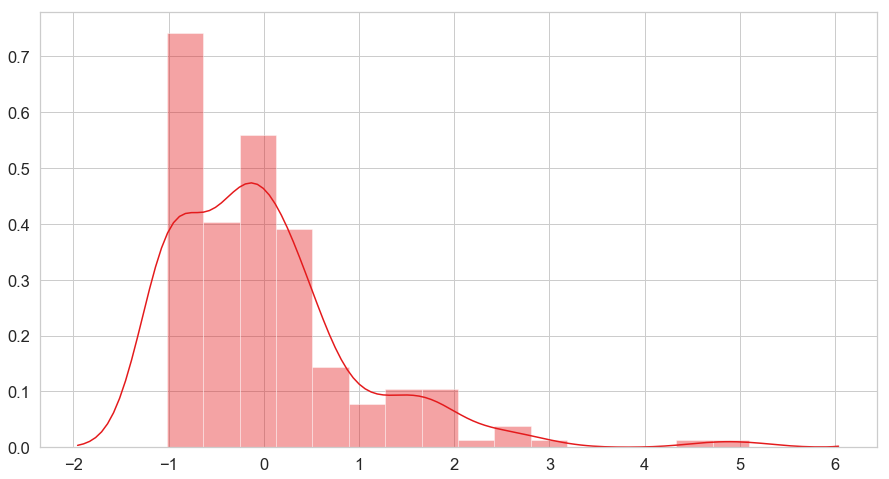

In [273]:
mili_z_score = []
mili_mean = final_df['mili_exp_%_gdp'].mean()
mili_std = final_df['mili_exp_%_gdp'].std()

for i, row in final_df.iterrows():
    mili_z_score.append((row['mili_exp_%_gdp']-mili_mean)/mili_std)

plt.figure(figsize=(15,8))
sns.distplot(mili_z_score)
plt.show()

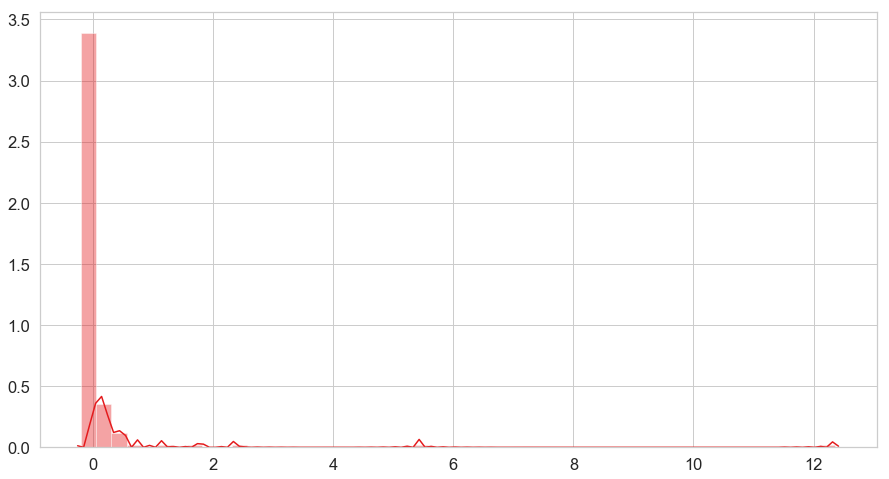

In [274]:
carbon_z_score = []
carbon_mean = final_df['carbon_emissions_from_energy_consumption_MT'].mean()
carbon_std = final_df['carbon_emissions_from_energy_consumption_MT'].std()

for i, row in final_df.iterrows():
    carbon_z_score.append((row['carbon_emissions_from_energy_consumption_MT']-carbon_mean)/carbon_std)

plt.figure(figsize=(15,8))
sns.distplot(carbon_z_score)
plt.show()

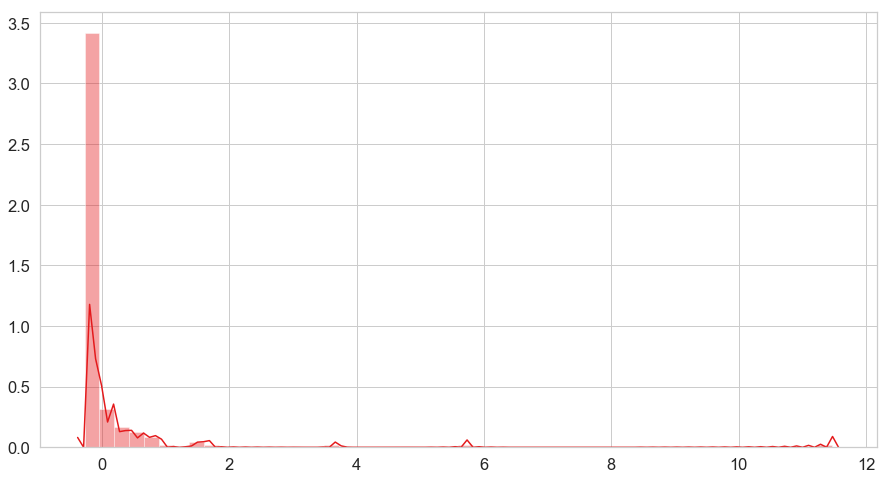

In [275]:
internet_z_score = []
internet_mean = final_df['number_of_internet_users'].mean()
internet_std = final_df['number_of_internet_users'].std()

for i, row in final_df.iterrows():
    internet_z_score.append((row['number_of_internet_users']-internet_mean)/internet_std)

plt.figure(figsize=(15,8))
sns.distplot(internet_z_score)
plt.show()

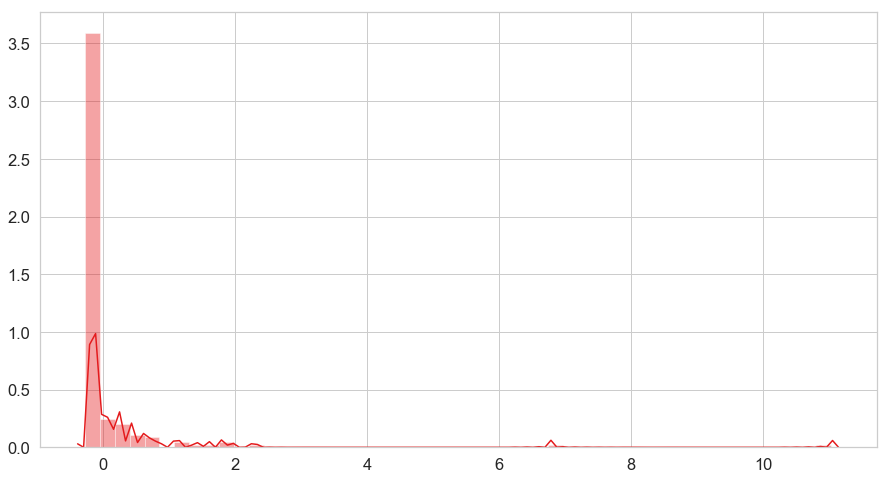

In [276]:
petrol_z_score = []
petrol_mean = final_df['refined_petroleum_consumption_barrels_per_day'].mean()
petrol_std = final_df['refined_petroleum_consumption_barrels_per_day'].std()

for i, row in final_df.iterrows():
    petrol_z_score.append((row['refined_petroleum_consumption_barrels_per_day']-petrol_mean)/petrol_std)

plt.figure(figsize=(15,8))
sns.distplot(petrol_z_score)
plt.show()

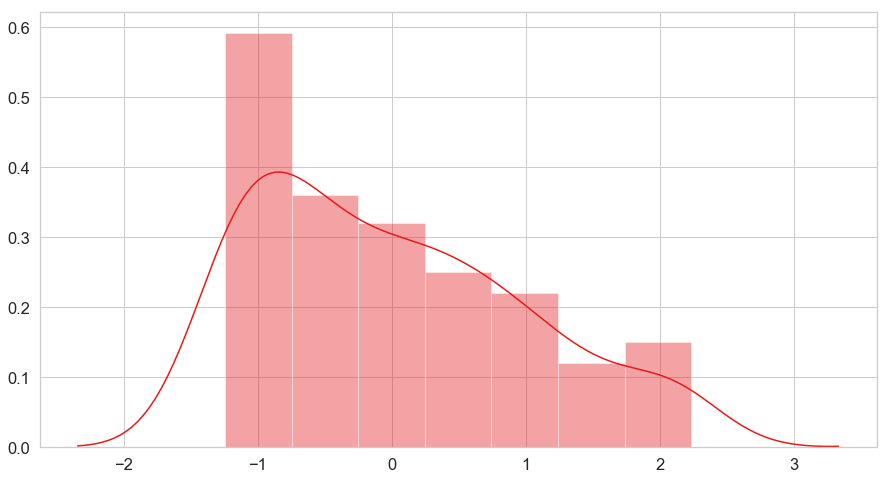

In [277]:
renewables_z_score = []
renewables_mean = final_df['renewable_electricity'].mean()
renewables_std = final_df['renewable_electricity'].std()

for i, row in final_df.iterrows():
    renewables_z_score.append((row['renewable_electricity']-renewables_mean)/renewables_std)

plt.figure(figsize=(15,8))
sns.distplot(renewables_z_score)
plt.show()

In [278]:
final_df['mili_exp_intermediate'] = final_df['mili_exp_%_gdp'].add(1).round(6) * 100
final_df['renewable_electricity_intermediate'] = final_df['renewable_electricity'].add(1).round(6) * 100

In [279]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population,renewable_electricity,mili_exp_intermediate,renewable_electricity_intermediate
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,3.93,"1,847,000,000.00","141,722,205.00",33.00,493.00,"3,400.00"
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,1.31,"640,600,000.00","37,694,085.00",77.00,231.00,"7,800.00"
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,3.42,"5,242,000,000.00","332,639,102.00",30.00,442.00,"3,100.00"
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,1.87,"11,670,000,000.00","1,394,015,977.00",38.00,287.00,"3,900.00"
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,1.48,"513,800,000.00","211,715,973.00",83.00,248.00,"8,400.00"


In [280]:
final_df['mili_log'] = np.log10(final_df['mili_exp_intermediate'])
final_df['co2_log'] = np.log10(final_df['carbon_emissions_from_energy_consumption_MT'])
final_df['renew_log'] = np.log10(final_df['renewable_electricity_intermediate'])
final_df['area_log'] = np.log10(final_df['Area_sqKm'])
final_df['petrol_log'] = np.log10(final_df['refined_petroleum_consumption_barrels_per_day'])
final_df['int_log'] = np.log10(final_df['number_of_internet_users'])
final_df['pop_log'] = np.log10(final_df['Population'])

log_df = final_df[["continent_name","country","mili_log", "co2_log","renew_log","area_log", "petrol_log","int_log"]].copy()


In [281]:
log_df.sort_values('renew_log', ascending = False)

,continent_name,country,mili_log,co2_log,renew_log,area_log,petrol_log,int_log
122,Africa,Lesotho,2.45,5.85,4.01,4.48,3.70,5.73
175,South America,Paraguay,2.29,6.89,4.00,5.61,4.63,6.55
182,Asia,Timor-Leste,2.21,5.73,4.00,4.17,3.54,5.50
131,Africa,Malawi,2.27,6.03,4.00,5.07,3.78,6.25
21,Asia,Bhutan,2.00,5.78,4.00,4.58,3.48,5.50
...,...,...,...,...,...,...,...,...
31,Asia,Brunei,2.53,7.00,2.00,3.76,4.26,5.61
226,North America,Trinidad and Tobago,2.25,7.69,2.00,3.71,4.71,5.93
100,Asia,Hong Kong,2.00,8.01,2.00,3.04,5.61,6.78
232,North America,Turks and Caicos Islands,2.00,5.35,2.00,2.98,3.15,-inf


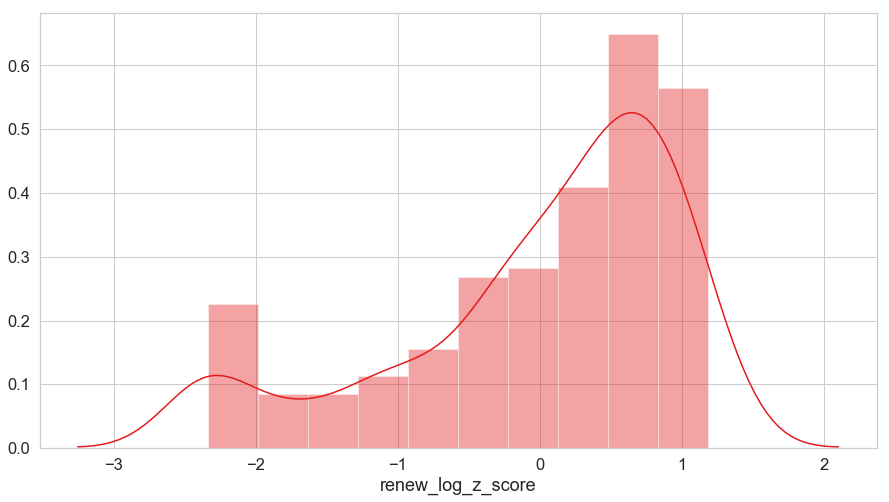

In [282]:
renewables_log_mean = log_df['renew_log'].mean()
renewables_log_std = log_df['renew_log'].std()

log_df['renew_log_z_score'] = (log_df['renew_log']-renewables_log_mean)/renewables_log_std

plt.figure(figsize=(15,8))
sns.distplot(log_df['renew_log_z_score'])
plt.show()

In [283]:
log_df.head()

,continent_name,country,mili_log,co2_log,renew_log,area_log,petrol_log,int_log,renew_log_z_score
187,Europe,Russia,2.69,9.27,3.53,7.23,6.56,8.04,0.35
37,North America,Canada,2.36,8.81,3.89,7.00,6.39,7.50,0.98
243,North America,United States,2.65,9.72,3.49,6.99,7.30,8.39,0.28
44,Asia,China,2.46,10.07,3.59,6.98,7.10,8.86,0.45
26,South America,Brazil,2.39,8.71,3.92,6.93,6.47,8.09,1.04


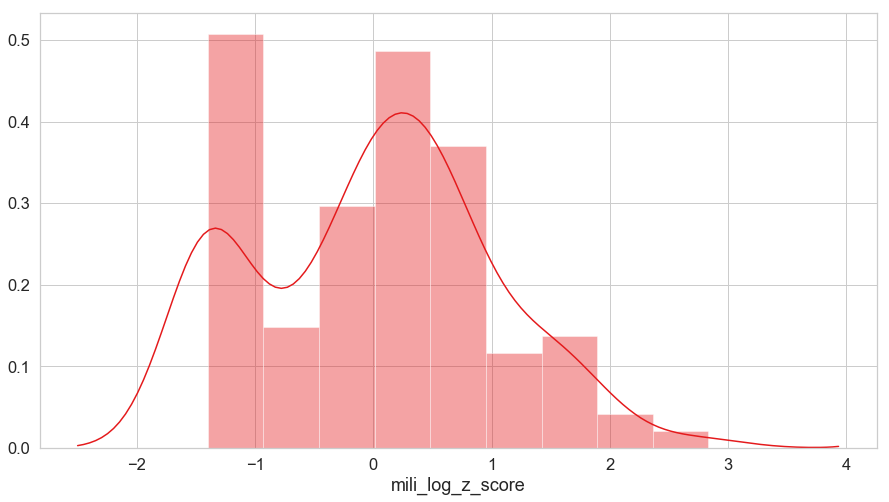

In [284]:
mili_log_mean = log_df['mili_log'].mean()
mili_log_std = log_df['mili_log'].std()

log_df['mili_log_z_score'] = (log_df['mili_log']-mili_log_mean)/mili_log_std

plt.figure(figsize=(15,8))
sns.distplot(log_df['mili_log_z_score'])
plt.show()

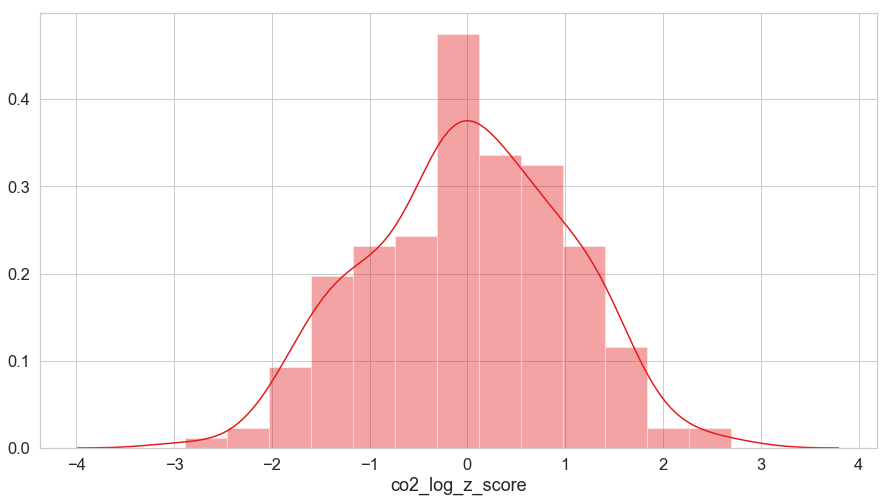

In [285]:
carbon_log_mean = log_df['co2_log'].mean()
carbon_log_std = log_df['co2_log'].std()

log_df['co2_log_z_score'] = (log_df['co2_log']-carbon_log_mean)/carbon_log_std

plt.figure(figsize=(15,8))
sns.distplot(log_df['co2_log_z_score'])
plt.show()

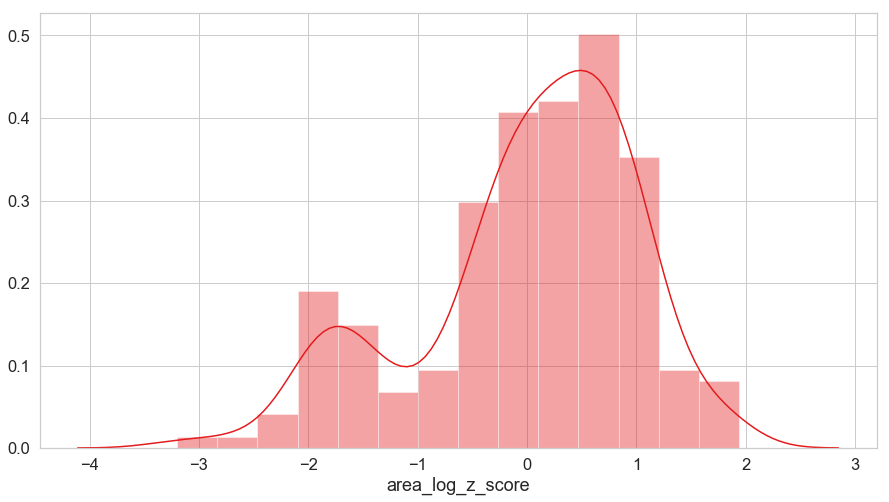

In [286]:
area_log_mean = log_df['area_log'].mean()
area_log_std = log_df['area_log'].std()

log_df['area_log_z_score'] = (log_df['area_log']-area_log_mean)/area_log_std

plt.figure(figsize=(15,8))
sns.distplot(log_df['area_log_z_score'])
plt.show()

In [287]:
log_df.head()

,continent_name,country,mili_log,co2_log,renew_log,area_log,petrol_log,int_log,renew_log_z_score,mili_log_z_score,co2_log_z_score,area_log_z_score
187,Europe,Russia,2.69,9.27,3.53,7.23,6.56,8.04,0.35,1.56,1.98,1.94
37,North America,Canada,2.36,8.81,3.89,7.00,6.39,7.50,0.98,0.15,1.56,1.75
243,North America,United States,2.65,9.72,3.49,6.99,7.30,8.39,0.28,1.36,2.38,1.74
44,Asia,China,2.46,10.07,3.59,6.98,7.10,8.86,0.45,0.56,2.70,1.74
26,South America,Brazil,2.39,8.71,3.92,6.93,6.47,8.09,1.04,0.29,1.48,1.69


In [288]:
log_df.continent_name.nunique()

6

In [289]:
log_df.shape

(201, 12)

In [190]:
final_df_rename = final_df.copy()
final_df_rename.columns = ['continent_name', 'country', 'Area_sqKm',
       'refined_petroleum_consumption_barrels_per_day',
       'number_of_internet_users',
       'hydro_percentage_of_electricity_production',
       'nuclear_percentage_of_electricity_production',
       'other_renewable_percentage_of_electricity_production',
       'mili_exp', 'carbon_emissions_from_energy_consumption_MT',
       'renewable_electricity', 'mili_log', 'co2_log', 'renew_log', 'area_log',
       'petrol_log', 'int_log']

ValueError: Length mismatch: Expected axis has 18 elements, new values have 17 elements

In [191]:
final_df.isnull()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population,renewable_electricity,mili_log,co2_log,renew_log,area_log,petrol_log,int_log
187,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [192]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,Population,renewable_electricity,mili_log,co2_log,renew_log,area_log,petrol_log,int_log
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,493.00,"1,847,000,000.00","141,722,205.00","3,400.00",2.69,9.27,3.53,7.23,6.56,8.04
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,231.00,"640,600,000.00","37,694,085.00","7,800.00",2.36,8.81,3.89,7.00,6.39,7.50
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,442.00,"5,242,000,000.00","332,639,102.00","3,100.00",2.65,9.72,3.49,6.99,7.30,8.39
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,287.00,"11,670,000,000.00","1,394,015,977.00","3,900.00",2.46,10.07,3.59,6.98,7.10,8.86
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,248.00,"513,800,000.00","211,715,973.00","8,400.00",2.39,8.71,3.92,6.93,6.47,8.09


In [193]:
lm = ols('co2_log ~ C(continent_name) + mili_log + renew_log + petrol_log', data=final_df_rename).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)

                   sum_sq     df        F  PR(>F)
C(continent_name)    1.36   5.00     6.15    0.00
mili_log             0.06   1.00     1.31    0.25
renew_log            0.07   1.00     1.48    0.23
petrol_log         127.24   1.00 2,883.13    0.00
Residual             8.47 192.00      nan     nan


In [194]:
lm = ols('co2_log ~ C(continent_name)', data=final_df_rename).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)

                   sum_sq     df     F  PR(>F)
C(continent_name)   84.94   5.00 20.41    0.00
Residual           162.29 195.00   nan     nan


In [195]:
lm = ols('mili_log ~ C(continent_name)', data=final_df_rename).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)

                   sum_sq     df     F  PR(>F)
C(continent_name)    3.49   5.00 18.20    0.00
Residual             7.47 195.00   nan     nan


In [196]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov=aov[cols]
    return aov
anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(continent_name),3.49,5.00,0.70,18.20,0.00,0.32,0.30
Residual,7.47,195.00,0.04,nan,nan,nan,nan


In [343]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,...,renewable_electricity,mili_exp_intermediate,renewable_electricity_intermediate,mili_log,co2_log,renew_log,area_log,petrol_log,int_log,pop_log
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,3.93,"1,847,000,000.00",...,33.00,493.00,"3,400.00",2.69,9.27,3.53,7.23,6.56,8.04,8.15
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,1.31,"640,600,000.00",...,77.00,231.00,"7,800.00",2.36,8.81,3.89,7.00,6.39,7.50,7.58
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,3.42,"5,242,000,000.00",...,30.00,442.00,"3,100.00",2.65,9.72,3.49,6.99,7.30,8.39,8.52
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,1.87,"11,670,000,000.00",...,38.00,287.00,"3,900.00",2.46,10.07,3.59,6.98,7.10,8.86,9.14
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,1.48,"513,800,000.00",...,83.00,248.00,"8,400.00",2.39,8.71,3.92,6.93,6.47,8.09,8.33


In [197]:
X = final_df[['mili_log','renew_log','petrol_log']]
y = final_df['co2_log']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                co2_log   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1586.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          1.23e-137
Time:                        10:32:40   Log-Likelihood:                 18.082
No. Observations:                 201   AIC:                            -28.16
Df Residuals:                     197   BIC:                            -14.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6104      0.176      9.129      0.000       1.262       1.958
mili_log       0.2053      0.079      2.588      0.010       0.049       0.362
renew_log     -0.0308      0.028     -1.097      0.274      -0.086       0.025
petrol_log     1.0798      0.019     56.936      0.000       1.042       1.117
==============================================================================
Omnibus:                       37.243   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.612
Skew:                          -0.008   Prob(JB):                     8.26e-84
Kurtosis:                       9.759   Cond. No.                         75.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
fig = px.box(final_df, x="continent_name",y="co2_log")
fig.show()

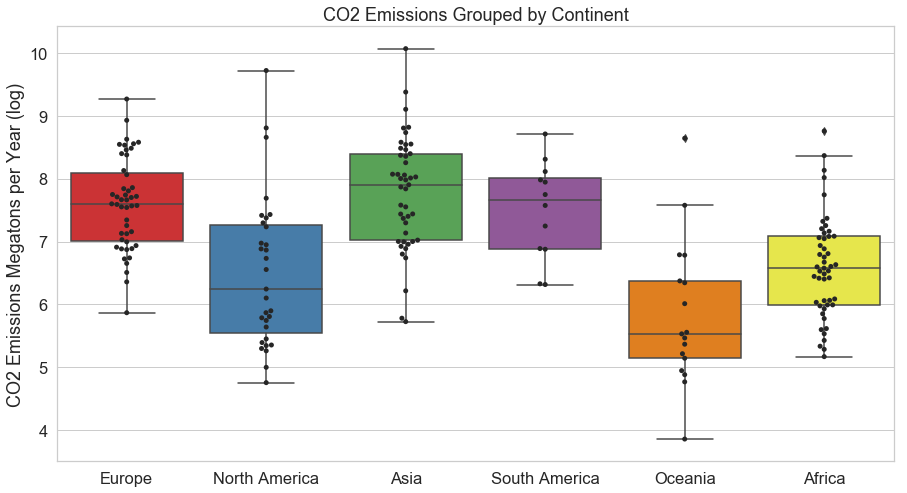

In [382]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.set_palette("Set1")
sns.set_style("whitegrid")
sns.boxplot(x='continent_name',y='co2_log',data=final_df)
sns.swarmplot(x='continent_name',y='co2_log',data=final_df, color=".15")
plt.xlabel("")
plt.ylabel("CO2 Emissions Megatons per Year (log)")
plt.title("CO2 Emissions Grouped by Continent")

file_path = "/Users/ravimalde/dsc-files/student/Projects/CIA_project/"
plt.savefig(file_path + "co2.png")
plt.show()



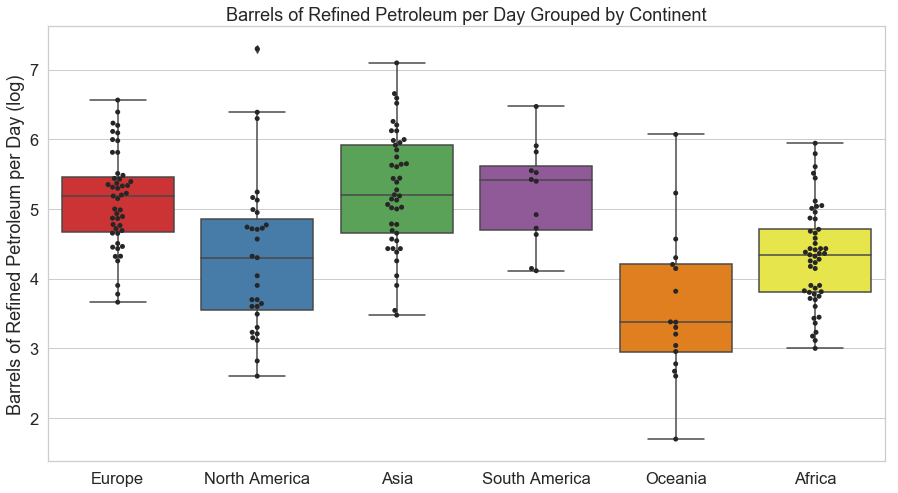

In [381]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.set_palette("Set1")
sns.set_style("whitegrid")
# sns.boxplot(x='continent_name',y='refined_petroleum_consumption_barrels_per_day',data=final_df)
# sns.swarmplot(x='continent_name',y='refined_petroleum_consumption_barrels_per_day',data=final_df, color=".15")
sns.boxplot(x='continent_name',y='petrol_log',data=final_df)
sns.swarmplot(x='continent_name',y='petrol_log',data=final_df, color=".15")
plt.xlabel("")
plt.ylabel("Barrels of Refined Petroleum per Day (log)")
plt.title("Barrels of Refined Petroleum per Day Grouped by Continent")

file_path = "/Users/ravimalde/dsc-files/student/Projects/CIA_project/"
plt.savefig(file_path + "petrol.png")
plt.show()



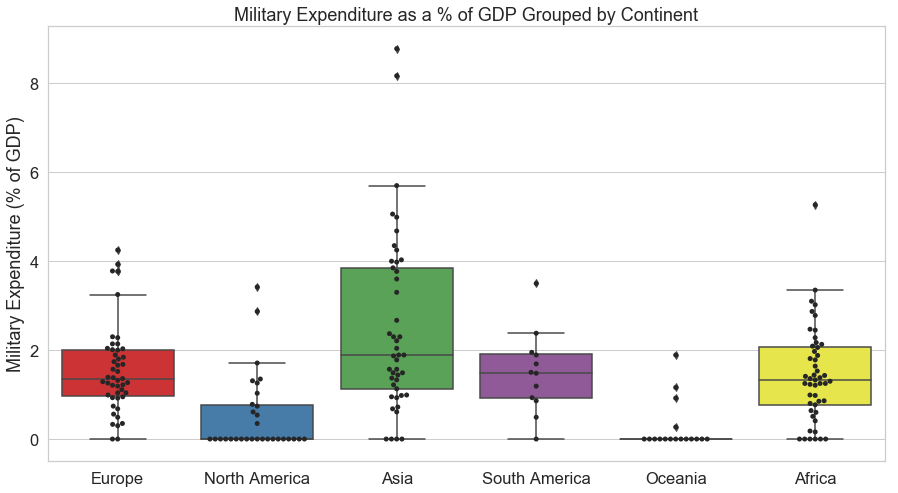

In [377]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.set_palette("Set1")
sns.set_style("whitegrid")
sns.boxplot(x='continent_name',y='mili_exp_%_gdp',data=final_df)
sns.swarmplot(x='continent_name',y='mili_exp_%_gdp',data=final_df, color=".15")
plt.xlabel("")
plt.ylabel("Military Expenditure (% of GDP)")
plt.title("Military Expenditure as a % of GDP Grouped by Continent")

file_path = "/Users/ravimalde/dsc-files/student/Projects/CIA_Project/"
plt.savefig(file_path + "military.png")
plt.show()



In [378]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,...,renewable_electricity,mili_exp_intermediate,renewable_electricity_intermediate,mili_log,co2_log,renew_log,area_log,petrol_log,int_log,pop_log
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,3.93,"1,847,000,000.00",...,33.00,493.00,"3,400.00",2.69,9.27,3.53,7.23,6.56,8.04,8.15
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,1.31,"640,600,000.00",...,77.00,231.00,"7,800.00",2.36,8.81,3.89,7.00,6.39,7.50,7.58
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,3.42,"5,242,000,000.00",...,30.00,442.00,"3,100.00",2.65,9.72,3.49,6.99,7.30,8.39,8.52
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,1.87,"11,670,000,000.00",...,38.00,287.00,"3,900.00",2.46,10.07,3.59,6.98,7.10,8.86,9.14
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,1.48,"513,800,000.00",...,83.00,248.00,"8,400.00",2.39,8.71,3.92,6.93,6.47,8.09,8.33


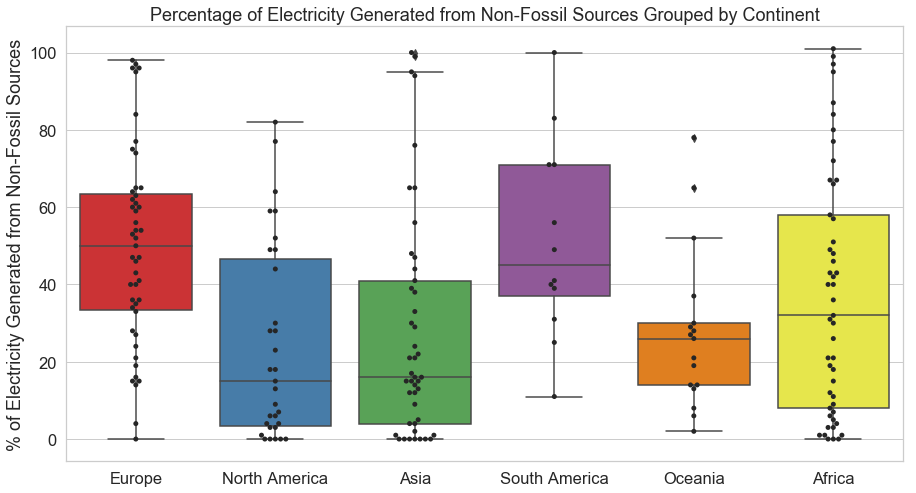

In [379]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.set_palette("Set1")
sns.set_style("whitegrid")
# sns.boxplot(x='continent_name',y='renew_log',data=final_df)
# sns.swarmplot(x='continent_name',y='renew_log',data=final_df, color=".15")
sns.boxplot(x='continent_name',y='renewable_electricity',data=final_df)
sns.swarmplot(x='continent_name',y='renewable_electricity',data=final_df, color=".15")
plt.xlabel("")
plt.ylabel("% of Electricity Generated from Non-Fossil Sources")
plt.title("Percentage of Electricity Generated from Non-Fossil Sources Grouped by Continent")

file_path = "/Users/ravimalde/dsc-files/student/Projects/CIA_project/"
plt.savefig(file_path + "renewables.png")
plt.show()



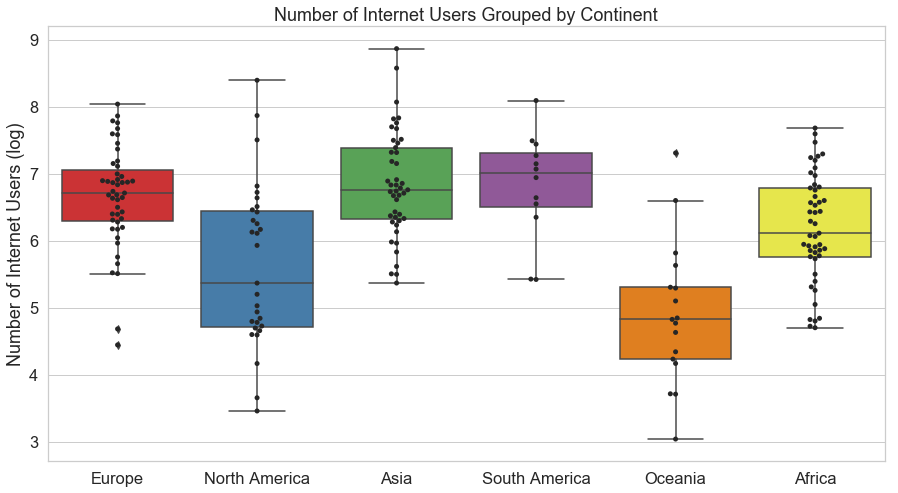

In [380]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.set_palette("Set1")
sns.set_style("whitegrid")
sns.boxplot(x='continent_name',y='int_log',data=final_df)
sns.swarmplot(x='continent_name',y='int_log',data=final_df, color=".15")
plt.xlabel("")
plt.ylabel("Number of Internet Users (log)")
plt.title("Number of Internet Users Grouped by Continent")

file_path = "/Users/ravimalde/dsc-files/student/Projects/CIA_project/"
plt.savefig(file_path + "internet.png")
plt.show()



In [348]:
final_df.head()

,continent_name,country,Area_sqKm,refined_petroleum_consumption_barrels_per_day,number_of_internet_users,hydro_percentage_of_electricity_production,nuclear_percentage_of_electricity_production,other_renewable_percentage_of_electricity_production,mili_exp_%_gdp,carbon_emissions_from_energy_consumption_MT,...,renewable_electricity,mili_exp_intermediate,renewable_electricity_intermediate,mili_log,co2_log,renew_log,area_log,petrol_log,int_log,pop_log
187,Europe,Russia,"17,098,242.00","3,650,000.00","108,772,470.00",21.00,11.00,1.00,3.93,"1,847,000,000.00",...,33.00,493.00,"3,400.00",2.69,9.27,3.53,7.23,6.56,8.04,8.15
37,North America,Canada,"9,984,670.00","2,445,000.00","31,770,034.00",56.00,9.00,12.00,1.31,"640,600,000.00",...,77.00,231.00,"7,800.00",2.36,8.81,3.89,7.00,6.39,7.50,7.58
243,North America,United States,"9,833,517.00","19,960,000.00","246,809,221.00",7.00,9.00,14.00,3.42,"5,242,000,000.00",...,30.00,442.00,"3,100.00",2.65,9.72,3.49,6.99,7.30,8.39,8.52
44,Asia,China,"9,596,960.00","12,470,000.00","730,723,960.00",18.00,2.00,18.00,1.87,"11,670,000,000.00",...,38.00,287.00,"3,900.00",2.46,10.07,3.59,6.98,7.10,8.86,9.14
26,South America,Brazil,"8,515,770.00","2,956,000.00","122,841,218.00",64.00,1.00,18.00,1.48,"513,800,000.00",...,83.00,248.00,"8,400.00",2.39,8.71,3.92,6.93,6.47,8.09,8.33


In [228]:
fig = px.scatter(final_df,
                 x ="pop_log",
                 y ="co2_log",
                 color ="continent_name",
                 hover_name = "country"
                )
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

In [346]:
fig = px.scatter(final_df,
                 x ="pop_log",
                 y ="int_log",
                 color ="continent_name",
                 hover_name = "country"
                )
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

In [350]:
fig = px.scatter(final_df,
                 x ="pop_log",
                 y ="mili_log",
                 color ="continent_name",
                 hover_name = "country"
                )
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

In [351]:
fig = px.scatter(final_df,
                 x ="pop_log",
                 y ="petrol_log",
                 color ="continent_name",
                 hover_name = "country"
                )
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

In [358]:
fig = px.scatter(final_df,
                 x ="pop_log",
                 y ="renew_log",
                 color ="continent_name",
                 hover_name = "country"
                )
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()